<a href="https://colab.research.google.com/github/Codift05/ColabArchive/blob/main/Dataset_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
np.random.seed(42)
n_samples = 1000

# Generate sample e-commerce data with intentional issues for preprocessing
sample_data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.randint(18, 70, n_samples),
    'gender': np.random.choice(['Male', 'Female', 'M', 'F', None], n_samples, p=[0.35, 0.35, 0.1, 0.1, 0.1]),
    'city': np.random.choice(['Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Semarang', 'jakarta', 'JAKARTA'], n_samples),
    'membership': np.random.choice(['Bronze', 'Silver', 'Gold', 'Platinum'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'total_spend': np.random.exponential(scale=500, size=n_samples),
    'num_purchases': np.random.poisson(lam=10, size=n_samples),
    'days_since_last_purchase': np.random.randint(1, 365, n_samples),
    'satisfaction_score': np.random.uniform(1, 5, n_samples),
    'email_domain': np.random.choice(['gmail.com', 'yahoo.com', 'hotmail.com', 'company.com'], n_samples),
    'account_age_days': np.random.randint(30, 1825, n_samples),  # 1 month to 5 years
    'newsletter_subscriber': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    'preferred_payment': np.random.choice(['Credit Card', 'Debit Card', 'E-Wallet', 'Bank Transfer'], n_samples),
    'is_churned': np.random.choice([0, 1], n_samples, p=[0.75, 0.25])
}

In [4]:
# Mengubah dictionary menjadi Pandas DataFrame
ecommerce_df = pd.DataFrame(sample_data)

# Menampilkan 5 baris pertama dari DataFrame
print("--- 5 Baris Pertama Data E-commerce ---")
display(ecommerce_df.head())

# Menampilkan informasi umum tentang DataFrame (tipe data, jumlah non-null, dll.)
print("\n--- Informasi DataFrame ---")
display(ecommerce_df.info())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif Data Numerik ---")
display(ecommerce_df.describe())

--- 5 Baris Pertama Data E-commerce ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,email_domain,account_age_days,newsletter_subscriber,preferred_payment,is_churned
0,1,56,Female,Medan,Platinum,471.505730,3,106,1.451433,yahoo.com,1022,1,Bank Transfer,1
1,2,69,Male,Bandung,Gold,87.394245,11,204,3.437871,hotmail.com,1438,1,Debit Card,0
2,3,46,Male,jakarta,Gold,559.885406,7,1,4.282306,gmail.com,298,0,E-Wallet,0
3,4,32,Female,Semarang,Bronze,98.770345,13,245,2.140977,company.com,1507,0,Bank Transfer,0
4,5,60,Male,Medan,Platinum,592.002727,10,72,1.956844,company.com,728,0,Bank Transfer,0



--- Informasi DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   gender                    905 non-null    object 
 3   city                      1000 non-null   object 
 4   membership                1000 non-null   object 
 5   total_spend               1000 non-null   float64
 6   num_purchases             1000 non-null   int64  
 7   days_since_last_purchase  1000 non-null   int64  
 8   satisfaction_score        1000 non-null   float64
 9   email_domain              1000 non-null   object 
 10  account_age_days          1000 non-null   int64  
 11  newsletter_subscriber     1000 non-null   int64  
 12  preferred_payment         1000 non-null   object 
 13  is_churned                1000 non-

None


--- Statistik Deskriptif Data Numerik ---


,customer_id,age,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,newsletter_subscriber,is_churned
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,500.500000,43.81900,482.852369,9.990000,182.803000,2.928672,949.927000,0.72400,0.24900
std,288.819436,14.99103,494.391279,3.256148,104.296548,1.149981,512.104535,0.44724,0.43265
min,1.000000,18.00000,0.015360,2.000000,1.000000,1.000972,31.000000,0.00000,0.00000
25%,250.750000,31.00000,133.355590,8.000000,89.000000,1.924131,515.250000,0.00000,0.00000
50%,500.500000,44.00000,334.275984,10.000000,182.500000,2.883730,976.000000,1.00000,0.00000
75%,750.250000,56.00000,660.793605,12.000000,275.000000,3.886762,1394.500000,1.00000,0.00000
max,1000.000000,69.00000,3861.764761,21.000000,364.000000,4.989692,1824.000000,1.00000,1.00000


Anda dapat menyimpan DataFrame `ecommerce_df` ke dalam file Excel (.xlsx) menggunakan method `.to_excel()`.

In [5]:
# Menyimpan DataFrame ke file Excel
# index=False agar index DataFrame tidak ikut tersimpan sebagai kolom di Excel
ecommerce_df.to_excel('data_ecommerce.xlsx', index=False)

print("DataFrame berhasil disimpan ke file 'data_ecommerce.xlsx'")

DataFrame berhasil disimpan ke file 'data_ecommerce.xlsx'


In [6]:
%pip install openpyxl

In [7]:
# Periksa jumlah nilai kosong di setiap kolom
print("--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df ---")
display(ecommerce_df.isnull().sum())

--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df ---


,0
customer_id,0
age,0
gender,95
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
email_domain,0


In [8]:
# 1. Periksa nilai unik pada kolom gender
print("--- Nilai Unik pada Kolom Gender Sebelum Penanganan ---")
display(ecommerce_df['gender'].unique())

# 2. Tentukan strategi penanganan - Imputasi dengan Modus
# Karena gender adalah data kategorikal, mengisi dengan modus adalah strategi yang umum.

# 3. Hitung modus dari kolom gender
# .mode()[0] digunakan karena .mode() bisa mengembalikan Series jika ada lebih dari satu modus
modus_gender = ecommerce_df['gender'].mode()[0]
print(f"\nModus dari Kolom Gender: {modus_gender}")

# 4. Isi nilai kosong (NaN) pada kolom gender dengan nilai modus
ecommerce_df['gender'].fillna(modus_gender, inplace=True)

# 5. Periksa kembali jumlah nilai kosong setelah pengisian
print("\n--- Jumlah Nilai Kosong (Missing Values) pada Kolom Gender Setelah Penanganan ---")
display(ecommerce_df['gender'].isnull().sum())

# Tampilkan nilai unik setelah penanganan untuk konfirmasi
print("\n--- Nilai Unik pada Kolom Gender Setelah Penanganan ---")
display(ecommerce_df['gender'].unique())

--- Nilai Unik pada Kolom Gender Sebelum Penanganan ---


array(['Female', 'Male', 'F', 'M', None], dtype=object)


Modus dari Kolom Gender: Male

--- Jumlah Nilai Kosong (Missing Values) pada Kolom Gender Setelah Penanganan ---


/tmp/ipython-input-2813548823.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce_df['gender'].fillna(modus_gender, inplace=True)


np.int64(0)


--- Nilai Unik pada Kolom Gender Setelah Penanganan ---


array(['Female', 'Male', 'F', 'M'], dtype=object)

In [9]:
# 1. Periksa nilai unik pada kolom city sebelum diseragamkan
print("--- Nilai Unik pada Kolom City Sebelum Diseragamkan ---")
display(ecommerce_df['city'].unique())

# 2. Ubah semua nilai pada kolom city menjadi format Title Case
# Menggunakan .str.title() untuk mengkapitalisasi huruf pertama setiap kata
ecommerce_df['city'] = ecommerce_df['city'].str.title()

# 3. Periksa kembali nilai unik pada kolom city setelah diseragamkan
print("\n--- Nilai Unik pada Kolom City Setelah Diseragamkan (Title Case) ---")
display(ecommerce_df['city'].unique())

--- Nilai Unik pada Kolom City Sebelum Diseragamkan ---


array(['Medan', 'Bandung', 'jakarta', 'Semarang', 'Jakarta', 'Surabaya',
       'JAKARTA'], dtype=object)


--- Nilai Unik pada Kolom City Setelah Diseragamkan (Title Case) ---


array(['Medan', 'Bandung', 'Jakarta', 'Semarang', 'Surabaya'],
      dtype=object)

In [12]:
# Periksa kembali jumlah nilai kosong di setiap kolom
print("--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Preprocessing ---")
display(ecommerce_df.isnull().sum())

# Tampilkan beberapa baris pertama untuk visual check data kategorikal
print("\n--- 5 Baris Pertama Data Setelah Preprocessing ---")
display(ecommerce_df.head())

# Tampilkan nilai unik pada kolom gender
print("\n--- Nilai Unik pada Kolom Gender Setelah Preprocessing ---")
display(ecommerce_df['gender'].unique())

# Tampilkan nilai unik pada kolom city
print("\n--- Nilai Unik pada Kolom City Setelah Preprocessing ---")
display(ecommerce_df['city'].unique())

--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Preprocessing ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
email_domain,0



--- 5 Baris Pertama Data Setelah Preprocessing ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,email_domain,account_age_days,newsletter_subscriber,preferred_payment,is_churned
0,1,56,Female,Medan,Platinum,471.505730,3,106,1.451433,yahoo.com,1022,1,Bank Transfer,1
1,2,69,Male,Bandung,Gold,87.394245,11,204,3.437871,hotmail.com,1438,1,Debit Card,0
2,3,46,Male,Jakarta,Gold,559.885406,7,1,4.282306,gmail.com,298,0,E-Wallet,0
3,4,32,Female,Semarang,Bronze,98.770345,13,245,2.140977,company.com,1507,0,Bank Transfer,0
4,5,60,Male,Medan,Platinum,592.002727,10,72,1.956844,company.com,728,0,Bank Transfer,0



--- Nilai Unik pada Kolom Gender Setelah Preprocessing ---


array(['Female', 'Male'], dtype=object)


--- Nilai Unik pada Kolom City Setelah Preprocessing ---


array(['Medan', 'Bandung', 'Jakarta', 'Semarang', 'Surabaya'],
      dtype=object)

**Reasoning**:
The check for missing values and the 'city' column formatting was successful. However, the 'gender' column still contains inconsistent values ('F', 'M'). The next step is to clean the 'gender' column and verify the cleaning.



In [13]:
# Seragamkan nilai pada kolom 'gender'
ecommerce_df['gender'] = ecommerce_df['gender'].replace({'M': 'Male', 'F': 'Female'})

# Periksa kembali nilai unik pada kolom gender setelah diseragamkan
print("\n--- Nilai Unik pada Kolom Gender Setelah Diseragamkan ---")
display(ecommerce_df['gender'].unique())

# Periksa kembali jumlah nilai kosong (redundant check, but good for verification)
print("\n--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Diseragamkan Gender ---")
display(ecommerce_df.isnull().sum())


--- Nilai Unik pada Kolom Gender Setelah Diseragamkan ---


array(['Female', 'Male'], dtype=object)


--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Diseragamkan Gender ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
email_domain,0


In [15]:
# Create a raw version of the dataframe from the original sample_data dictionary
df_raw = pd.DataFrame(sample_data)

# Add missing values randomly
missing_indices_age = np.random.choice(n_samples, size=50, replace=False)
df_raw.loc[missing_indices_age, 'age'] = np.nan

missing_indices_satisfaction = np.random.choice(n_samples, size=80, replace=False)
df_raw.loc[missing_indices_satisfaction, 'satisfaction_score'] = np.nan

# Add some outliers
outlier_indices = np.random.choice(n_samples, size=30, replace=False)
df_raw.loc[outlier_indices, 'total_spend'] = df_raw.loc[outlier_indices, 'total_spend'] * 15

# Add some duplicates
duplicate_rows = df_raw.sample(20)
df_raw = pd.concat([df_raw, duplicate_rows], ignore_index=True)

# Display info about the new raw dataframe
print("--- Info DataFrame df_raw dengan Missing Values, Outlier, dan Duplikat ---")
display(df_raw.info())

# Check for missing values
print("\n--- Jumlah Missing Values per Kolom di df_raw ---")
display(df_raw.isnull().sum())

# Check for duplicates
print("\n--- Jumlah Duplikat di df_raw ---")
display(df_raw.duplicated().sum())

--- Info DataFrame df_raw dengan Missing Values, Outlier, dan Duplikat ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1020 non-null   int64  
 1   age                       969 non-null    float64
 2   gender                    923 non-null    object 
 3   city                      1020 non-null   object 
 4   membership                1020 non-null   object 
 5   total_spend               1020 non-null   float64
 6   num_purchases             1020 non-null   int64  
 7   days_since_last_purchase  1020 non-null   int64  
 8   satisfaction_score        938 non-null    float64
 9   email_domain              1020 non-null   object 
 10  account_age_days          1020 non-null   int64  
 11  newsletter_subscriber     1020 non-null   int64  
 12  preferred_payment         1020 non-null   o

None


--- Jumlah Missing Values per Kolom di df_raw ---


,0
customer_id,0
age,51
gender,97
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,82
email_domain,0



--- Jumlah Duplikat di df_raw ---


np.int64(20)

In [17]:
# Periksa jumlah nilai kosong di setiap kolom
print("--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df ---")
display(ecommerce_df.isnull().sum())

--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
email_domain,0


In [19]:
# 1. Periksa nilai unik pada kolom gender
print("--- Nilai Unik pada Kolom Gender Sebelum Penanganan ---")
display(ecommerce_df['gender'].unique())

# 2. Tentukan strategi penanganan - Imputasi dengan Modus
# Karena gender adalah data kategorikal, mengisi dengan modus adalah strategi yang umum.

# 3. Hitung modus dari kolom gender
# .mode()[0] digunakan karena .mode() bisa mengembalikan Series jika ada lebih dari satu modus
modus_gender = ecommerce_df['gender'].mode()[0]
print(f"\nModus dari Kolom Gender: {modus_gender}")

# 4. Isi nilai kosong (NaN) pada kolom gender dengan nilai modus
ecommerce_df['gender'].fillna(modus_gender, inplace=True)

# 5. Periksa kembali jumlah nilai kosong setelah pengisian
print("\n--- Jumlah Nilai Kosong (Missing Values) pada Kolom Gender Setelah Penanganan ---")
display(ecommerce_df['gender'].isnull().sum())

# Tampilkan nilai unik setelah penanganan untuk konfirmasi
print("\n--- Nilai Unik pada Kolom Gender Setelah Penanganan ---")
display(ecommerce_df['gender'].unique())

--- Nilai Unik pada Kolom Gender Sebelum Penanganan ---


array(['Female', 'Male'], dtype=object)


Modus dari Kolom Gender: Male

--- Jumlah Nilai Kosong (Missing Values) pada Kolom Gender Setelah Penanganan ---


/tmp/ipython-input-2813548823.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce_df['gender'].fillna(modus_gender, inplace=True)


np.int64(0)


--- Nilai Unik pada Kolom Gender Setelah Penanganan ---


array(['Female', 'Male'], dtype=object)

In [20]:
# Seragamkan nilai pada kolom 'gender'
ecommerce_df['gender'] = ecommerce_df['gender'].replace({'M': 'Male', 'F': 'Female'})

# Periksa kembali nilai unik pada kolom gender setelah diseragamkan
print("\n--- Nilai Unik pada Kolom Gender Setelah Diseragamkan ---")
display(ecommerce_df['gender'].unique())

# Periksa kembali jumlah nilai kosong (redundant check, but good for verification)
print("\n--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Diseragamkan Gender ---")
display(ecommerce_df.isnull().sum())


--- Nilai Unik pada Kolom Gender Setelah Diseragamkan ---


array(['Female', 'Male'], dtype=object)


--- Jumlah Nilai Kosong (Missing Values) per Kolom Setelah Diseragamkan Gender ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
email_domain,0


**Reasoning**:
Based on the instructions, I need to create new features from `days_since_last_purchase` and `account_age_days`. I will create a binary feature for recent purchases and a categorical feature for account age.



In [21]:
# Create a binary feature for recent purchases (e.g., less than 7 days)
ecommerce_df['is_recent_buyer'] = (ecommerce_df['days_since_last_purchase'] < 7).astype(int)

# Create a categorical feature for account age
bins = [0, 365, 365 * 3, ecommerce_df['account_age_days'].max()]
labels = ['<1 Year', '1-3 Years', '>3 Years']
ecommerce_df['account_age_category'] = pd.cut(ecommerce_df['account_age_days'], bins=bins, labels=labels, right=True)

# Display the new features and the first few rows
print("\n--- DataFrame with New Features ---")
display(ecommerce_df[['days_since_last_purchase', 'is_recent_buyer', 'account_age_days', 'account_age_category']].head())

# Display value counts for the new categorical feature
print("\n--- Value Counts for Account Age Category ---")
display(ecommerce_df['account_age_category'].value_counts())


--- DataFrame with New Features ---


,days_since_last_purchase,is_recent_buyer,account_age_days,account_age_category
0,106,0,1022,1-3 Years
1,204,0,1438,>3 Years
2,1,1,298,<1 Year
3,245,0,1507,>3 Years
4,72,0,728,1-3 Years



--- Value Counts for Account Age Category ---


,count
account_age_category,
>3 Years,427
1-3 Years,405
<1 Year,168


**Reasoning**:
Create two new features by combining existing columns, handling potential division by zero or infinite values, and then display the updated dataframe.



In [22]:
# Create 'average_order_value' handling division by zero
# Replace 0 in num_purchases with NaN first to handle it consistently with fillna
ecommerce_df['num_purchases_for_avg'] = ecommerce_df['num_purchases'].replace(0, np.nan)
ecommerce_df['average_order_value'] = ecommerce_df['total_spend'] / ecommerce_df['num_purchases_for_avg']

# Handle potential infinities or NaNs resulting from division by zero or missing values
# Fill NaN/inf values in 'average_order_value' with 0 (or another appropriate strategy)
ecommerce_df['average_order_value'].fillna(0, inplace=True)
ecommerce_df.drop('num_purchases_for_avg', axis=1, inplace=True) # Drop the temporary column

# Create 'spend_per_day_since_last_purchase' handling division by zero
# Replace 0 in days_since_last_purchase with NaN first
ecommerce_df['days_since_last_purchase_for_spend'] = ecommerce_df['days_since_last_purchase'].replace(0, np.nan)
ecommerce_df['spend_per_day_since_last_purchase'] = ecommerce_df['total_spend'] / ecommerce_df['days_since_last_purchase_for_spend']

# Handle potential infinities or NaNs resulting from division by zero or missing values
# Fill NaN/inf values in 'spend_per_day_since_last_purchase' with 0 (or another appropriate strategy)
ecommerce_df['spend_per_day_since_last_purchase'].fillna(0, inplace=True)
ecommerce_df.drop('days_since_last_purchase_for_spend', axis=1, inplace=True) # Drop the temporary column


# Display the first few rows with the new features
print("\n--- DataFrame with Interaction Features ---")
display(ecommerce_df[['total_spend', 'num_purchases', 'average_order_value',
                      'days_since_last_purchase', 'spend_per_day_since_last_purchase']].head())


--- DataFrame with Interaction Features ---


/tmp/ipython-input-3618125830.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce_df['average_order_value'].fillna(0, inplace=True)
/tmp/ipython-input-3618125830.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,total_spend,num_purchases,average_order_value,days_since_last_purchase,spend_per_day_since_last_purchase
0,471.505730,3,157.168577,106,4.448167
1,87.394245,11,7.944931,204,0.428403
2,559.885406,7,79.983629,1,559.885406
3,98.770345,13,7.597719,245,0.403144
4,592.002727,10,59.200273,72,8.222260


**Reasoning**:
Define the mapping for the 'membership' column and apply it to create a new numerical column 'membership_level'. Then, display the relevant columns and the value counts of the new column to verify the transformation.



In [23]:
# 1. Define a mapping for the 'membership' column
membership_mapping = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

# 2. Apply this mapping to the 'membership' column to create a new numerical column
ecommerce_df['membership_level'] = ecommerce_df['membership'].map(membership_mapping)

# 3. Display the first few rows of the DataFrame
print("--- DataFrame with Original and Mapped Membership Levels ---")
display(ecommerce_df[['membership', 'membership_level']].head())

# 4. Display the value counts of the new 'membership_level' column
print("\n--- Value Counts for Membership Level ---")
display(ecommerce_df['membership_level'].value_counts())

--- DataFrame with Original and Mapped Membership Levels ---


,membership,membership_level
0,Platinum,4
1,Gold,3
2,Gold,3
3,Bronze,1
4,Platinum,4



--- Value Counts for Membership Level ---


,count
membership_level,
1,406
2,291
3,202
4,101


**Reasoning**:
Identify and one-hot encode the non-ordinal categorical columns.



In [24]:
# Identify non-ordinal categorical columns (excluding 'gender', 'city', 'membership', which are already handled or will be handled differently)
# 'customer_id' is an identifier and should not be encoded.
# 'email_domain', 'preferred_payment' are non-ordinal categorical columns
categorical_cols_to_encode = ['email_domain', 'preferred_payment']

# Apply One-Hot Encoding using pd.get_dummies()
ecommerce_df_encoded = pd.get_dummies(ecommerce_df, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the updated DataFrame
print("--- First 5 rows after One-Hot Encoding ---")
display(ecommerce_df_encoded.head())

# Display the columns of the updated DataFrame to confirm changes
print("\n--- Columns after One-Hot Encoding ---")
display(ecommerce_df_encoded.columns)

--- First 5 rows after One-Hot Encoding ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,56,Female,Medan,Platinum,471.505730,3,106,1.451433,1022,...,1-3 Years,157.168577,4.448167,4,False,False,True,False,False,False
1,2,69,Male,Bandung,Gold,87.394245,11,204,3.437871,1438,...,>3 Years,7.944931,0.428403,3,False,True,False,False,True,False
2,3,46,Male,Jakarta,Gold,559.885406,7,1,4.282306,298,...,<1 Year,79.983629,559.885406,3,True,False,False,False,False,True
3,4,32,Female,Semarang,Bronze,98.770345,13,245,2.140977,1507,...,>3 Years,7.597719,0.403144,1,False,False,False,False,False,False
4,5,60,Male,Medan,Platinum,592.002727,10,72,1.956844,728,...,1-3 Years,59.200273,8.222260,4,False,False,False,False,False,False



--- Columns after One-Hot Encoding ---


Index(['customer_id', 'age', 'gender', 'city', 'membership', 'total_spend',
       'num_purchases', 'days_since_last_purchase', 'satisfaction_score',
       'account_age_days', 'newsletter_subscriber', 'is_churned',
       'is_recent_buyer', 'account_age_category', 'average_order_value',
       'spend_per_day_since_last_purchase', 'membership_level',
       'email_domain_gmail.com', 'email_domain_hotmail.com',
       'email_domain_yahoo.com', 'preferred_payment_Credit Card',
       'preferred_payment_Debit Card', 'preferred_payment_E-Wallet'],
      dtype='object')

**Reasoning**:
Identify the numerical columns to scale, choose StandardScaler for standardization, apply it to the selected columns, and display the first few rows and descriptive statistics of the scaled data to verify the result.



In [25]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling. Exclude 'customer_id', binary columns, and engineered categorical columns.
numerical_cols_to_scale = [
    'age',
    'total_spend',
    'num_purchases',
    'days_since_last_purchase',
    'satisfaction_score',
    'account_age_days',
    'average_order_value',
    'spend_per_day_since_last_purchase'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns
# Fit and transform the selected columns
ecommerce_df_encoded[numerical_cols_to_scale] = scaler.fit_transform(ecommerce_df_encoded[numerical_cols_to_scale])

# Display the first few rows of the scaled DataFrame
print("--- First 5 rows after Standardization ---")
display(ecommerce_df_encoded.head())

# Display descriptive statistics for the scaled numerical columns to verify
print("\n--- Descriptive Statistics of Scaled Numerical Columns ---")
display(ecommerce_df_encoded[numerical_cols_to_scale].describe())

--- First 5 rows after Standardization ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,0.812959,Female,Medan,Platinum,-0.022962,-2.147782,-0.736759,-1.285220,0.140809,...,1-3 Years,1.702941,-0.091845,4,False,False,True,False,False,False
1,2,1.680578,Male,Bandung,Gold,-0.800289,0.310338,0.203339,0.443010,0.953550,...,>3 Years,-0.759858,-0.175635,3,False,True,False,False,True,False
2,3,0.145560,Male,Jakarta,Gold,0.155892,-0.918722,-1.744008,1.177681,-1.273672,...,<1 Year,0.429075,11.485893,3,True,False,False,False,False,True
3,4,-0.788799,Female,Semarang,Bronze,-0.777267,0.924868,0.596646,-0.685306,1.088355,...,>3 Years,-0.765589,-0.176161,1,False,False,False,False,False,False
4,5,1.079919,Male,Medan,Platinum,0.220888,0.003073,-1.062916,-0.845504,-0.433580,...,1-3 Years,0.086064,-0.013177,4,False,False,False,False,False,False



--- Descriptive Statistics of Scaled Numerical Columns ---


,age,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,average_order_value,spend_per_day_since_last_purchase
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.634248e-16,6.217249e-18,-7.638334e-17,3.197442e-17,4.138911e-16,-4.085621e-17,-3.286260e-17,-7.105427e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.723158e+00,-9.771180e-01,-2.455047e+00,-1.744008e+00,-1.677127e+00,-1.795311e+00,-8.909608e-01,-1.845634e-01
25%,-8.555393e-01,-7.072772e-01,-6.114573e-01,-8.998374e-01,-8.739659e-01,-8.492299e-01,-6.595115e-01,-1.686453e-01
50%,1.207993e-02,-3.006743e-01,3.072650e-03,-2.906631e-03,-3.910084e-02,5.093891e-02,-2.851922e-01,-1.430723e-01
75%,8.129592e-01,3.600999e-01,6.176026e-01,8.844313e-01,8.335515e-01,8.685638e-01,3.202640e-01,-7.622801e-02
max,1.680578e+00,6.837910e+00,3.382987e+00,1.738194e+00,1.793117e+00,1.707679e+00,8.213479e+00,1.913704e+01


**Reasoning**:
The numerical features have been standardized. The next step is to save the resulting DataFrame to an Excel file as requested in the main task description, which completes the overall task.



In [26]:
# Save the resulting DataFrame to an Excel file
ecommerce_df_encoded.to_excel('ecommerce_data_processed.xlsx', index=False)

print("Processed DataFrame successfully saved to 'ecommerce_data_processed.xlsx'")

Processed DataFrame successfully saved to 'ecommerce_data_processed.xlsx'


## Cek kembali data

### Subtask:
Periksa kembali DataFrame setelah penambahan fitur baru dan transformasi.


**Reasoning**:
Display the information, missing values, descriptive statistics, and the head of the DataFrame to verify the results of the feature engineering and transformation steps.



In [27]:
# Tampilkan informasi umum DataFrame ecommerce_df_encoded
print("--- Informasi DataFrame ecommerce_df_encoded ---")
display(ecommerce_df_encoded.info())

# Tampilkan jumlah nilai kosong di setiap kolom
print("\n--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df_encoded ---")
display(ecommerce_df_encoded.isnull().sum())

# Tampilkan statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif Data Numerik (Setelah Standardisasi) ---")
display(ecommerce_df_encoded.describe())

# Tampilkan 5 baris pertama DataFrame ecommerce_df_encoded
print("\n--- 5 Baris Pertama Data Setelah Semua Transformasi ---")
display(ecommerce_df_encoded.head())

--- Informasi DataFrame ecommerce_df_encoded ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customer_id                        1000 non-null   int64   
 1   age                                1000 non-null   float64 
 2   gender                             1000 non-null   object  
 3   city                               1000 non-null   object  
 4   membership                         1000 non-null   object  
 5   total_spend                        1000 non-null   float64 
 6   num_purchases                      1000 non-null   float64 
 7   days_since_last_purchase           1000 non-null   float64 
 8   satisfaction_score                 1000 non-null   float64 
 9   account_age_days                   1000 non-null   float64 
 10  newsletter_subscriber              1000 non-null   int64   


None


--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df_encoded ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
account_age_days,0



--- Statistik Deskriptif Data Numerik (Setelah Standardisasi) ---


,customer_id,age,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,newsletter_subscriber,is_churned,is_recent_buyer,average_order_value,spend_per_day_since_last_purchase,membership_level
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,-1.634248e-16,6.217249e-18,-7.638334e-17,3.197442e-17,4.138911e-16,-4.085621e-17,0.72400,0.24900,0.011000,-3.286260e-17,-7.105427e-18,1.998000
std,288.819436,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.44724,0.43265,0.104355,1.000500e+00,1.000500e+00,1.006483
min,1.000000,-1.723158e+00,-9.771180e-01,-2.455047e+00,-1.744008e+00,-1.677127e+00,-1.795311e+00,0.00000,0.00000,0.000000,-8.909608e-01,-1.845634e-01,1.000000
25%,250.750000,-8.555393e-01,-7.072772e-01,-6.114573e-01,-8.998374e-01,-8.739659e-01,-8.492299e-01,0.00000,0.00000,0.000000,-6.595115e-01,-1.686453e-01,1.000000
50%,500.500000,1.207993e-02,-3.006743e-01,3.072650e-03,-2.906631e-03,-3.910084e-02,5.093891e-02,1.00000,0.00000,0.000000,-2.851922e-01,-1.430723e-01,2.000000
75%,750.250000,8.129592e-01,3.600999e-01,6.176026e-01,8.844313e-01,8.335515e-01,8.685638e-01,1.00000,0.00000,0.000000,3.202640e-01,-7.622801e-02,3.000000
max,1000.000000,1.680578e+00,6.837910e+00,3.382987e+00,1.738194e+00,1.793117e+00,1.707679e+00,1.00000,1.00000,1.000000,8.213479e+00,1.913704e+01,4.000000



--- 5 Baris Pertama Data Setelah Semua Transformasi ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,0.812959,Female,Medan,Platinum,-0.022962,-2.147782,-0.736759,-1.285220,0.140809,...,1-3 Years,1.702941,-0.091845,4,False,False,True,False,False,False
1,2,1.680578,Male,Bandung,Gold,-0.800289,0.310338,0.203339,0.443010,0.953550,...,>3 Years,-0.759858,-0.175635,3,False,True,False,False,True,False
2,3,0.145560,Male,Jakarta,Gold,0.155892,-0.918722,-1.744008,1.177681,-1.273672,...,<1 Year,0.429075,11.485893,3,True,False,False,False,False,True
3,4,-0.788799,Female,Semarang,Bronze,-0.777267,0.924868,0.596646,-0.685306,1.088355,...,>3 Years,-0.765589,-0.176161,1,False,False,False,False,False,False
4,5,1.079919,Male,Medan,Platinum,0.220888,0.003073,-1.062916,-0.845504,-0.433580,...,1-3 Years,0.086064,-0.013177,4,False,False,False,False,False,False


## Summary:

### Data Analysis Key Findings

*   Two new features were successfully created: `is_recent_buyer` (binary) and `account_age_category` (categorical), derived from `days_since_last_purchase` and `account_age_days` respectively.
*   Interaction features `average_order_value` (total\_spend / num\_purchases) and `spend_per_day_since_last_purchase` (total\_spend / days\_since\_last\_purchase) were created, with appropriate handling for division by zero or missing values.
*   The ordinal categorical column 'membership' was successfully mapped to a numerical column `membership_level` (1=Bronze, 2=Silver, 3=Gold, 4=Platinum).
*   Non-ordinal categorical columns `email_domain` and `preferred_payment` were successfully one-hot encoded, adding new binary columns to the DataFrame.
*   Selected numerical columns (`age`, `total_spend`, `num_purchases`, `days_since_last_purchase`, `satisfaction_score`, `account_age_days`, `average_order_value`, `spend_per_day_since_last_purchase`) were successfully standardized using `StandardScaler`.
*   The final processed DataFrame contains 1000 entries and 23 columns with no missing values.
*   The processed DataFrame with all new and transformed features was successfully saved to 'ecommerce\_data\_processed.xlsx'.


Langkah 1 & 2 dari rencana *feature engineering* adalah membuat fitur baru dari kolom yang sudah ada dan fitur interaksi. Meskipun kita tidak memiliki kolom tanggal eksplisit, kita bisa membuat fitur yang merepresentasikan recency dan longevity dari kolom `days_since_last_purchase` dan `account_age_days`. Kita juga akan membuat fitur yang menggabungkan informasi dari `total_spend` dan `num_purchases`.

In [28]:
# Create a binary feature for recent purchases (e.g., less than 7 days)
ecommerce_df['is_recent_buyer'] = (ecommerce_df['days_since_last_purchase'] < 7).astype(int)

# Create a categorical feature for account age
bins = [0, 365, 365 * 3, ecommerce_df['account_age_days'].max()]
labels = ['<1 Year', '1-3 Years', '>3 Years']
ecommerce_df['account_age_category'] = pd.cut(ecommerce_df['account_age_days'], bins=bins, labels=labels, right=True)

# Display the new features and the first few rows
print("\n--- DataFrame with New Features ---")
display(ecommerce_df[['days_since_last_purchase', 'is_recent_buyer', 'account_age_days', 'account_age_category']].head())

# Display value counts for the new categorical feature
print("\n--- Value Counts for Account Age Category ---")
display(ecommerce_df['account_age_category'].value_counts())


--- DataFrame with New Features ---


,days_since_last_purchase,is_recent_buyer,account_age_days,account_age_category
0,106,0,1022,1-3 Years
1,204,0,1438,>3 Years
2,1,1,298,<1 Year
3,245,0,1507,>3 Years
4,72,0,728,1-3 Years



--- Value Counts for Account Age Category ---


,count
account_age_category,
>3 Years,427
1-3 Years,405
<1 Year,168


**Reasoning**:
Create two new features by combining existing columns, handling potential division by zero or infinite values, and then display the updated dataframe.

In [29]:
# Create 'average_order_value' handling division by zero
# Replace 0 in num_purchases with NaN first to handle it consistently with fillna
ecommerce_df['num_purchases_for_avg'] = ecommerce_df['num_purchases'].replace(0, np.nan)
ecommerce_df['average_order_value'] = ecommerce_df['total_spend'] / ecommerce_df['num_purchases_for_avg']

# Handle potential infinities or NaNs resulting from division by zero or missing values
# Fill NaN/inf values in 'average_order_value' with 0 (or another appropriate strategy)
ecommerce_df['average_order_value'].fillna(0, inplace=True)
ecommerce_df.drop('num_purchases_for_avg', axis=1, inplace=True) # Drop the temporary column

# Create 'spend_per_day_since_last_purchase' handling division by zero
# Replace 0 in days_since_last_purchase with NaN first
ecommerce_df['days_since_last_purchase_for_spend'] = ecommerce_df['days_since_last_purchase'].replace(0, np.nan)
ecommerce_df['spend_per_day_since_last_purchase'] = ecommerce_df['total_spend'] / ecommerce_df['days_since_last_purchase_for_spend']

# Handle potential infinities or NaNs resulting from division by zero or missing values
# Fill NaN/inf values in 'spend_per_day_since_last_purchase' with 0 (or another appropriate strategy)
ecommerce_df['spend_per_day_since_last_purchase'].fillna(0, inplace=True)
ecommerce_df.drop('days_since_last_purchase_for_spend', axis=1, inplace=True) # Drop the temporary column


# Display the first few rows with the new features
print("\n--- DataFrame with Interaction Features ---")
display(ecommerce_df[['total_spend', 'num_purchases', 'average_order_value',
                      'days_since_last_purchase', 'spend_per_day_since_last_purchase']].head())


--- DataFrame with Interaction Features ---


/tmp/ipython-input-3618125830.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce_df['average_order_value'].fillna(0, inplace=True)
/tmp/ipython-input-3618125830.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,total_spend,num_purchases,average_order_value,days_since_last_purchase,spend_per_day_since_last_purchase
0,471.505730,3,157.168577,106,4.448167
1,87.394245,11,7.944931,204,0.428403
2,559.885406,7,79.983629,1,559.885406
3,98.770345,13,7.597719,245,0.403144
4,592.002727,10,59.200273,72,8.222260


**Reasoning**:
Define the mapping for the 'membership' column and apply it to create a new numerical column 'membership_level'. Then, display the relevant columns and the value counts of the new column to verify the transformation.

In [30]:
# 1. Define a mapping for the 'membership' column
membership_mapping = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

# 2. Apply this mapping to the 'membership' column to create a new numerical column
ecommerce_df['membership_level'] = ecommerce_df['membership'].map(membership_mapping)

# 3. Display the first few rows of the DataFrame
print("--- DataFrame with Original and Mapped Membership Levels ---")
display(ecommerce_df[['membership', 'membership_level']].head())

# 4. Display the value counts of the new 'membership_level' column
print("\n--- Value Counts for Membership Level ---")
display(ecommerce_df['membership_level'].value_counts())

--- DataFrame with Original and Mapped Membership Levels ---


,membership,membership_level
0,Platinum,4
1,Gold,3
2,Gold,3
3,Bronze,1
4,Platinum,4



--- Value Counts for Membership Level ---


,count
membership_level,
1,406
2,291
3,202
4,101


**Reasoning**:
Identify and one-hot encode the non-ordinal categorical columns.

In [31]:
# Identify non-ordinal categorical columns (excluding 'gender', 'city', 'membership', which are already handled or will be handled differently)
# 'customer_id' is an identifier and should not be encoded.
# 'email_domain', 'preferred_payment' are non-ordinal categorical columns
categorical_cols_to_encode = ['email_domain', 'preferred_payment']

# Apply One-Hot Encoding using pd.get_dummies()
ecommerce_df_encoded = pd.get_dummies(ecommerce_df, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the updated DataFrame
print("--- First 5 rows after One-Hot Encoding ---")
display(ecommerce_df_encoded.head())

# Display the columns of the updated DataFrame to confirm changes
print("\n--- Columns after One-Hot Encoding ---")
display(ecommerce_df_encoded.columns)

--- First 5 rows after One-Hot Encoding ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,56,Female,Medan,Platinum,471.505730,3,106,1.451433,1022,...,1-3 Years,157.168577,4.448167,4,False,False,True,False,False,False
1,2,69,Male,Bandung,Gold,87.394245,11,204,3.437871,1438,...,>3 Years,7.944931,0.428403,3,False,True,False,False,True,False
2,3,46,Male,Jakarta,Gold,559.885406,7,1,4.282306,298,...,<1 Year,79.983629,559.885406,3,True,False,False,False,False,True
3,4,32,Female,Semarang,Bronze,98.770345,13,245,2.140977,1507,...,>3 Years,7.597719,0.403144,1,False,False,False,False,False,False
4,5,60,Male,Medan,Platinum,592.002727,10,72,1.956844,728,...,1-3 Years,59.200273,8.222260,4,False,False,False,False,False,False



--- Columns after One-Hot Encoding ---


Index(['customer_id', 'age', 'gender', 'city', 'membership', 'total_spend',
       'num_purchases', 'days_since_last_purchase', 'satisfaction_score',
       'account_age_days', 'newsletter_subscriber', 'is_churned',
       'is_recent_buyer', 'account_age_category', 'average_order_value',
       'spend_per_day_since_last_purchase', 'membership_level',
       'email_domain_gmail.com', 'email_domain_hotmail.com',
       'email_domain_yahoo.com', 'preferred_payment_Credit Card',
       'preferred_payment_Debit Card', 'preferred_payment_E-Wallet'],
      dtype='object')

**Reasoning**:
Identify the numerical columns to scale, choose StandardScaler for standardization, apply it to the selected columns, and display the first few rows and descriptive statistics of the scaled data to verify the result.

In [32]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling. Exclude 'customer_id', binary columns, and engineered categorical columns.
numerical_cols_to_scale = [
    'age',
    'total_spend',
    'num_purchases',
    'days_since_last_purchase',
    'satisfaction_score',
    'account_age_days',
    'average_order_value',
    'spend_per_day_since_last_purchase'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns
# Fit and transform the selected columns
ecommerce_df_encoded[numerical_cols_to_scale] = scaler.fit_transform(ecommerce_df_encoded[numerical_cols_to_scale])

# Display the first few rows of the scaled DataFrame
print("--- First 5 rows after Standardization ---")
display(ecommerce_df_encoded.head())

# Display descriptive statistics for the scaled numerical columns to verify
print("\n--- Descriptive Statistics of Scaled Numerical Columns ---")
display(ecommerce_df_encoded[numerical_cols_to_scale].describe())

--- First 5 rows after Standardization ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,0.812959,Female,Medan,Platinum,-0.022962,-2.147782,-0.736759,-1.285220,0.140809,...,1-3 Years,1.702941,-0.091845,4,False,False,True,False,False,False
1,2,1.680578,Male,Bandung,Gold,-0.800289,0.310338,0.203339,0.443010,0.953550,...,>3 Years,-0.759858,-0.175635,3,False,True,False,False,True,False
2,3,0.145560,Male,Jakarta,Gold,0.155892,-0.918722,-1.744008,1.177681,-1.273672,...,<1 Year,0.429075,11.485893,3,True,False,False,False,False,True
3,4,-0.788799,Female,Semarang,Bronze,-0.777267,0.924868,0.596646,-0.685306,1.088355,...,>3 Years,-0.765589,-0.176161,1,False,False,False,False,False,False
4,5,1.079919,Male,Medan,Platinum,0.220888,0.003073,-1.062916,-0.845504,-0.433580,...,1-3 Years,0.086064,-0.013177,4,False,False,False,False,False,False



--- Descriptive Statistics of Scaled Numerical Columns ---


,age,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,average_order_value,spend_per_day_since_last_purchase
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.634248e-16,6.217249e-18,-7.638334e-17,3.197442e-17,4.138911e-16,-4.085621e-17,-3.286260e-17,-7.105427e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.723158e+00,-9.771180e-01,-2.455047e+00,-1.744008e+00,-1.677127e+00,-1.795311e+00,-8.909608e-01,-1.845634e-01
25%,-8.555393e-01,-7.072772e-01,-6.114573e-01,-8.998374e-01,-8.739659e-01,-8.492299e-01,-6.595115e-01,-1.686453e-01
50%,1.207993e-02,-3.006743e-01,3.072650e-03,-2.906631e-03,-3.910084e-02,5.093891e-02,-2.851922e-01,-1.430723e-01
75%,8.129592e-01,3.600999e-01,6.176026e-01,8.844313e-01,8.335515e-01,8.685638e-01,3.202640e-01,-7.622801e-02
max,1.680578e+00,6.837910e+00,3.382987e+00,1.738194e+00,1.793117e+00,1.707679e+00,8.213479e+00,1.913704e+01


**Reasoning**:
The numerical features have been standardized. The next step is to save the resulting DataFrame to an Excel file as requested in the main task description, which completes the overall task.

In [33]:
# Save the resulting DataFrame to an Excel file
ecommerce_df_encoded.to_excel('ecommerce_data_processed.xlsx', index=False)

print("Processed DataFrame successfully saved to 'ecommerce_data_processed.xlsx'")

Processed DataFrame successfully saved to 'ecommerce_data_processed.xlsx'


## Cek kembali data

### Subtask:
Periksa kembali DataFrame setelah penambahan fitur baru dan transformasi.

**Reasoning**:
Display the information, missing values, descriptive statistics, and the head of the DataFrame to verify the results of the feature engineering and transformation steps.

In [34]:
# Tampilkan informasi umum DataFrame ecommerce_df_encoded
print("--- Informasi DataFrame ecommerce_df_encoded ---")
display(ecommerce_df_encoded.info())

# Tampilkan jumlah nilai kosong di setiap kolom
print("\n--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df_encoded ---")
display(ecommerce_df_encoded.isnull().sum())

# Tampilkan statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif Data Numerik (Setelah Standardisasi) ---")
display(ecommerce_df_encoded.describe())

# Tampilkan 5 baris pertama DataFrame ecommerce_df_encoded
print("\n--- 5 Baris Pertama Data Setelah Semua Transformasi ---")
display(ecommerce_df_encoded.head())

--- Informasi DataFrame ecommerce_df_encoded ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customer_id                        1000 non-null   int64   
 1   age                                1000 non-null   float64 
 2   gender                             1000 non-null   object  
 3   city                               1000 non-null   object  
 4   membership                         1000 non-null   object  
 5   total_spend                        1000 non-null   float64 
 6   num_purchases                      1000 non-null   float64 
 7   days_since_last_purchase           1000 non-null   float64 
 8   satisfaction_score                 1000 non-null   float64 
 9   account_age_days                   1000 non-null   float64 
 10  newsletter_subscriber              1000 non-null   int64   


None


--- Jumlah Nilai Kosong (Missing Values) per Kolom di ecommerce_df_encoded ---


,0
customer_id,0
age,0
gender,0
city,0
membership,0
total_spend,0
num_purchases,0
days_since_last_purchase,0
satisfaction_score,0
account_age_days,0



--- Statistik Deskriptif Data Numerik (Setelah Standardisasi) ---


,customer_id,age,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,newsletter_subscriber,is_churned,is_recent_buyer,average_order_value,spend_per_day_since_last_purchase,membership_level
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,-1.634248e-16,6.217249e-18,-7.638334e-17,3.197442e-17,4.138911e-16,-4.085621e-17,0.72400,0.24900,0.011000,-3.286260e-17,-7.105427e-18,1.998000
std,288.819436,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.44724,0.43265,0.104355,1.000500e+00,1.000500e+00,1.006483
min,1.000000,-1.723158e+00,-9.771180e-01,-2.455047e+00,-1.744008e+00,-1.677127e+00,-1.795311e+00,0.00000,0.00000,0.000000,-8.909608e-01,-1.845634e-01,1.000000
25%,250.750000,-8.555393e-01,-7.072772e-01,-6.114573e-01,-8.998374e-01,-8.739659e-01,-8.492299e-01,0.00000,0.00000,0.000000,-6.595115e-01,-1.686453e-01,1.000000
50%,500.500000,1.207993e-02,-3.006743e-01,3.072650e-03,-2.906631e-03,-3.910084e-02,5.093891e-02,1.00000,0.00000,0.000000,-2.851922e-01,-1.430723e-01,2.000000
75%,750.250000,8.129592e-01,3.600999e-01,6.176026e-01,8.844313e-01,8.335515e-01,8.685638e-01,1.00000,0.00000,0.000000,3.202640e-01,-7.622801e-02,3.000000
max,1000.000000,1.680578e+00,6.837910e+00,3.382987e+00,1.738194e+00,1.793117e+00,1.707679e+00,1.00000,1.00000,1.000000,8.213479e+00,1.913704e+01,4.000000



--- 5 Baris Pertama Data Setelah Semua Transformasi ---


,customer_id,age,gender,city,membership,total_spend,num_purchases,days_since_last_purchase,satisfaction_score,account_age_days,...,account_age_category,average_order_value,spend_per_day_since_last_purchase,membership_level,email_domain_gmail.com,email_domain_hotmail.com,email_domain_yahoo.com,preferred_payment_Credit Card,preferred_payment_Debit Card,preferred_payment_E-Wallet
0,1,0.812959,Female,Medan,Platinum,-0.022962,-2.147782,-0.736759,-1.285220,0.140809,...,1-3 Years,1.702941,-0.091845,4,False,False,True,False,False,False
1,2,1.680578,Male,Bandung,Gold,-0.800289,0.310338,0.203339,0.443010,0.953550,...,>3 Years,-0.759858,-0.175635,3,False,True,False,False,True,False
2,3,0.145560,Male,Jakarta,Gold,0.155892,-0.918722,-1.744008,1.177681,-1.273672,...,<1 Year,0.429075,11.485893,3,True,False,False,False,False,True
3,4,-0.788799,Female,Semarang,Bronze,-0.777267,0.924868,0.596646,-0.685306,1.088355,...,>3 Years,-0.765589,-0.176161,1,False,False,False,False,False,False
4,5,1.079919,Male,Medan,Platinum,0.220888,0.003073,-1.062916,-0.845504,-0.433580,...,1-3 Years,0.086064,-0.013177,4,False,False,False,False,False,False


Langkah selanjutnya adalah membagi data yang sudah diproses menjadi *training set* dan *testing set* menggunakan `train_test_split` dari `sklearn.model_selection`. Kita akan memisahkan kolom fitur (X) dan kolom target (y).

In [35]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude 'customer_id' as it is an identifier
# Exclude original categorical columns that have been encoded or mapped
X = ecommerce_df_encoded.drop(['customer_id', 'is_churned', 'gender', 'city', 'membership', 'account_age_category'], axis=1)
y = ecommerce_df_encoded['is_churned']

# Perform train-test split
# We'll use a test size of 20% and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 17)
Shape of X_test: (200, 17)
Shape of y_train: (800,)
Shape of y_test: (200,)


Untuk memvisualisasikan hasil *train-test split* terkait distribusi variabel target (`is_churned`), kita dapat menampilkan jumlah atau proporsi setiap kelas di *training set* (`y_train`) dan *testing set* (`y_test`). Ini memastikan bahwa split dilakukan secara stratifikasi.

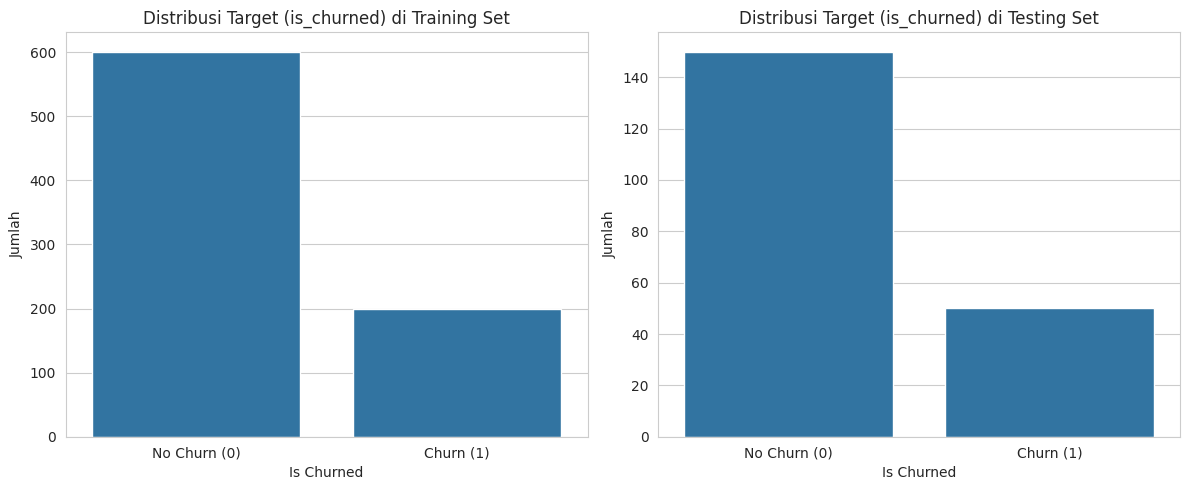


--- Value Counts for y_train ---


,proportion
is_churned,
0,0.75125
1,0.24875



--- Value Counts for y_test ---


,proportion
is_churned,
0,0.75
1,0.25


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribution in training set
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribusi Target (is_churned) di Training Set')
axes[0].set_xlabel('Is Churned')
axes[0].set_ylabel('Jumlah')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn (0)', 'Churn (1)'])

# Plot distribution in testing set
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Distribusi Target (is_churned) di Testing Set')
axes[1].set_xlabel('Is Churned')
axes[1].set_ylabel('Jumlah')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn (0)', 'Churn (1)'])

plt.tight_layout()
plt.show()

# Display value counts to confirm proportions
print("\n--- Value Counts for y_train ---")
display(y_train.value_counts(normalize=True))

print("\n--- Value Counts for y_test ---")
display(y_test.value_counts(normalize=True))